In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import scipy.signal as sc
from scipy.signal import find_peaks

In [7]:
base_path = '/Users/Andrei/ucsb_google_drive/lab/data/nitesh_q_measurements/'

In [165]:
def get_max_level(time, transPD):
    time_new_right = []
    time_new_left = []
    transPD_new_left = []
    transPD_new_right = []
    min_dip = min(transPD)
    ind_min = np.argmin(transPD)
    max_val = max(transPD)
    thresh = 0.8
    for t in range(len(transPD)):
        if transPD[t] > (min_dip + thresh*(max_val-min_dip)) and t < ind_min:
            time_new_left.append(time[t])
            transPD_new_left.append(transPD[t])   

        if transPD[t] > (min_dip + thresh*(max_val-min_dip)) and t > ind_min:
            time_new_right.append(time[t])
            transPD_new_right.append(transPD[t])   
            
            
    max_level = np.mean([np.mean(transPD_new_left),np.mean(transPD_new_right)])
    return max_level

In [166]:
def truncate(time,transPD,MZI,thresh):
    time_new = []
    transPD_new = []
    MZI_new = []
    min_dip = min(transPD)
    max_val = get_max_level(time, transPD)
    for t in range(len(transPD)):
        if transPD[t] < (min_dip + thresh*(max_val-min_dip)):
            time_new.append(time[t])
            transPD_new.append(transPD[t])   
            MZI_new.append(MZI[t])
    return time_new, transPD_new, MZI_new

In [173]:
def count_MZI_peaks(filename, chop_fraction = 0.5):
    path = base_path + filename
    df = pd.read_csv(path,header = 1)
    df = df.dropna()
    ax = plt.subplot(111)
    time = df['second']
    time = time.to_numpy()
    transPD = df['Volt']
    transPD = transPD.to_numpy()
    max_level = get_max_level(time,transPD)
    MZI = df['Volt.1']
    MZI = MZI.to_numpy()
    
    chop = int(chop_fraction*len(time))
    
    time = time[0:chop]
    MZI = MZI[0:chop]
    transPD = transPD[0:chop]
    #plt.plot(time,MZI,label='MZI fringes')
    #MZI = sc.savgol_filter(MZI, 5, 1)
    
    time_new, transPD_new, MZI_new = truncate(time,transPD,MZI,thresh=0.5)   
    plt.plot(time,np.ones(len(time))*max_level)
    plt.plot(time,transPD,label='transmitted PD output')
    plt.plot(time_new,transPD_new)
    #plt.plot(time,MZI,label='MZI fringes')
    ax.legend()
    plt.show()
    
    ax = plt.subplot(111)
    plt.plot(time_new,MZI_new)
    # indices = find_peaks(MZI_new)[0]

### Scope 0,1,2 Device 5, taken dec 3
### Scope 3, 4.  Device 6, taken Dec 4 seems to have highest Q
### Scope 5, 6   Device 7
### Scope 7,8.   Device 8

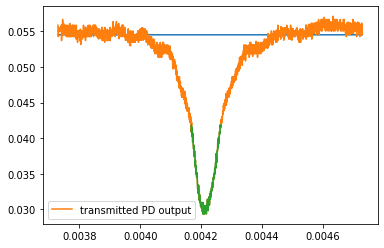

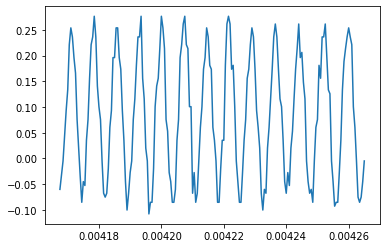

In [184]:
count_MZI_peaks(filename = 'scope_8.csv',chop_fraction = 1)